# 📘 Ejercicios de Cálculo Numérico - Nivel Medio

**FCEyN - UBA**

Este notebook contiene ejercicios de nivel medio para practicar los conceptos fundamentales de Cálculo Numérico.

## 📋 Instrucciones
- Cada ejercicio incluye variantes con diferentes valores
- Implementa tu solución en las celdas de código provistas
- Puedes agregar celdas adicionales si lo necesitas
- Recuerda documentar tu código y graficar resultados cuando corresponda

In [1]:
# Importaciones necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# # Configuración para mejores gráficos
# plt.style.use('seaborn-v0_8-darkgrid')
# plt.rcParams['figure.figsize'] = (10, 6)
# plt.rcParams['font.size'] = 12

### Ejercicio 1.2: Matriz Inversa por Gauss-Jordan

Calcula la matriz inversa usando el método de Gauss-Jordan.

**Variantes:**
- Variante A: `A = [[3,1], [2,4]]`
- Variante B: `A = [[2,1,0], [1,3,1], [0,1,2]]`
- Variante C: `A = [[5,2,1], [2,6,2], [1,2,7]]`

**Tareas:**
1. Calcular A⁻¹ usando Gauss-Jordan
2. Verificar que A·A⁻¹ = I
3. Calcular ||A|| · ||A⁻¹|| (número de condición)
4. Resolver Ax = b usando A⁻¹ y comparar con solución directa

In [17]:
# Selecciona la variante
# Variante B
A = np.array([[2, 2.61, 0], 
              [1, 3, 1], 
              [98, 0.03, 1]], dtype=float)

def gauss_jordan_inversa(A, epsilon=1e-9):
    """
    Calcula la matriz inversa usando Gauss-Jordan
    
    Parameters:
    A: matriz cuadrada
    
    Returns:
    A_inv: matriz inversa
    """
    if abs(np.linalg.det(A)) < epsilon:
        print("La matriz no es invertible")
        return None
    n = len(A)
    A_aum = np.hstack([A.copy().astype(float), np.eye(n)])

    # Gauss-Jordan
    for i in range(n):
        A_aum[i] = A_aum[i] / A_aum[i,i]   # Normalizar cada columna
        for j in range(n):
            if i != j:
                A_aum[j] = A_aum[j] - A_aum[j,i] * A_aum[i]  #Hacer que A_aum[j,i] = 0
    return A_aum[:, n:]

A_inv = gauss_jordan_inversa(A)
print(f"Debería de dar la identidad: \n {np.round(A @ A_inv, 3)} \n {A_inv}" )


Debería de dar la identidad: 
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]] 
 [[ 0.01146231 -0.01007294  0.01007294]
 [ 0.37435838  0.00771873 -0.00771873]
 [-1.13453746  0.98691675  0.01308325]]


---
## 🔄 Métodos Iterativos

### Ejercicio 2.1: Método de Gauss-Seidel

Implementa el método de Gauss-Seidel y compáralo con Jacobi.

**Variantes:**
- Variante A: `A = [[4,1,0], [1,4,1], [0,1,4]]`, `b = [10,12,14]`
- Variante B: `A = [[4,2,1], [1,5,2], [2,3,10]]`, `b = [11,13,25]`
- Variante C: Sistema tridiagonal 10x10 con diagonal principal = 4, subdiagonales = -1

**Tareas:**
1. Implementar Gauss-Seidel
2. Comparar velocidad de convergencia con Jacobi
3. Graficar ambos métodos en el mismo plot
4. Calcular número de iteraciones para cada método
5. Analizar por qué G-S converge más rápido

In [29]:
# Variante B
A = np.array([[4, 2, 1], 
              [1, 5, 2], 
              [2, 3, 10]], dtype=float)
b = np.array([11, 13, 25], dtype=float)

x0 = np.array([0, 0, 0])

def descomposicion_adit(A):
    L = np.tril(A, -1)
    D = np.diag(np.diag(A))
    U = np.triu(A, 1)
    return L, D, U

def gauss_seidel(A, b, x0, tol=1e-6, max_iter=100):
    """
    Método de Gauss-Seidel
    
    Returns:
    x: solución
    historial: norma del error en cada iteración
    """
    L, D, U = descomposicion_adit(A)
    M_GS = -np.linalg.inv(L + D) @ U
    C_GS = np.linalg.inv(L + D) @ b
    
    x = x0.copy()
    for k in range(max_iter):
        x_anterior = x.copy()
        x = M_GS @ x + C_GS
        print(f"Iter {k}, sol = {np.round(x, 3)}")
        if np.linalg.norm(x - x_anterior, np.inf) < tol:
            print(f"El método está por debajo de la toleracia impuesta, alcanzando como máximo la iteración {k}")
            return x, k+1, np.linalg.eigvals(M_GS)
    return x, max_iter, np.linalg.eigvals(M_GS)

def jacobi(A, b, x0, tol=1e-6, max_iter=100):
    """
    Método de Jacobi para comparación
    """
    L, D, U = descomposicion_adit(A)
    M_J = -np.linalg.inv(D) @ (L + U)
    C_J = np.linalg.inv(D) @ b
    
    x = x0.copy()
    for k in range(max_iter):
        x_anterior = x.copy()
        x = M_J @ x + C_J
        print(f"Iter {k}, sol = {np.round(x, 3)}")
        if np.linalg.norm(x - x_anterior, np.inf) < tol:
            print(f"El método está por debajo de la toleracia impuesta, alcanzando como máximo la iteración {k}")
            return x, k+1, np.linalg.eigvals(M_J)
    return x, max_iter, np.linalg.eigvals(M_J)

# Para ver si GS converge mas rápido que J, veamos que GS tenga menor radio espectral que J
sol_gs, iter_gs, autovals_gs = gauss_seidel(A, b, x0)
sol_j, iter_j, autovals_j = jacobi(A, b, x0)

print(f"radio espectral GS: {abs(max(autovals_gs)):.3f} \nradio espectral J: {abs(max(autovals_j)):.3f}")
print(f"entonces, radio espectral GS < radio espectral J: {abs(max(autovals_gs)) < abs(max(autovals_j))}")

Iter 0, sol = [2.75  2.05  1.335]
Iter 1, sol = [1.391 1.788 1.685]
Iter 2, sol = [1.435 1.639 1.721]
Iter 3, sol = [1.5   1.611 1.717]
Iter 4, sol = [1.515 1.61  1.714]
Iter 5, sol = [1.516 1.611 1.713]
Iter 6, sol = [1.516 1.611 1.713]
Iter 7, sol = [1.516 1.611 1.713]
Iter 8, sol = [1.516 1.611 1.713]
Iter 9, sol = [1.516 1.611 1.713]
Iter 10, sol = [1.516 1.611 1.713]
El método está por debajo de la toleracia impuesta, alcanzando como máximo la iteración 10
Iter 0, sol = [2.75 2.6  2.5 ]
Iter 1, sol = [0.825 1.05  1.17 ]
Iter 2, sol = [1.932 1.967 2.02 ]
Iter 3, sol = [1.261 1.406 1.523]
Iter 4, sol = [1.666 1.738 1.826]
Iter 5, sol = [1.424 1.536 1.645]
Iter 6, sol = [1.571 1.657 1.754]
Iter 7, sol = [1.483 1.584 1.689]
Iter 8, sol = [1.536 1.628 1.728]
Iter 9, sol = [1.504 1.602 1.704]
Iter 10, sol = [1.523 1.617 1.719]
Iter 11, sol = [1.512 1.608 1.71 ]
Iter 12, sol = [1.519 1.614 1.715]
Iter 13, sol = [1.514 1.61  1.712]
Iter 14, sol = [1.517 1.612 1.714]
Iter 15, sol = [1.515 

---
## 📈 Ecuaciones Diferenciales Ordinarias

### Ejercicio 3.1: Comparación de métodos para EDOs

Compara diferentes métodos numéricos para resolver EDOs.

**Problema:**
- EDO: `y' = -y + t²`, `y(0) = 1`
- Intervalo: `[0, 5]`
- Pasos: `h = 0.1, 0.05, 0.01`

**Tareas:**
1. Implementar Euler, Euler mejorado (Heun) y RK4
2. Comparar errores para diferentes h
3. Graficar log(error) vs log(h)
4. Verificar órdenes de convergencia (pendientes)
5. Comparar tiempos de ejecución

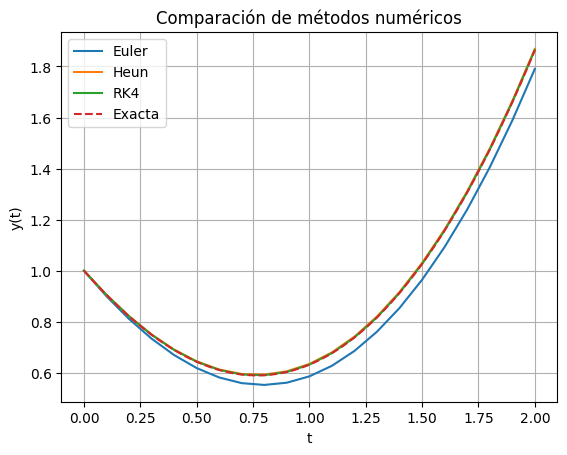

In [35]:
def euler(f, t0, tf, y0, h):
    """
    Método de Euler
    y_{n+1} = y_n + h * f(t_n, y_n)
    """
    cant_pasos = int((tf - t0)/h)
    y = y0
    t = t0
    valores_y = [y0]
    valores_t = [t0]
    for i in range(cant_pasos):
        y = y + h * f(t, y)  # ✓ CORRECTO: f(t, y)
        t += h
        valores_y.append(y)
        valores_t.append(t)
    return np.array(valores_y), np.array(valores_t)

def heun(f, t0, tf, y0, h):
    """
    Método de Euler mejorado (Heun)
    y_{n+1} = y_n + (h/2) * [f(t_n, y_n) + f(t_n + h, y_n + h*f(t_n, y_n))]
    """
    cant_pasos = int((tf - t0)/h)
    y = y0
    t = t0
    valores_y = [y0]
    valores_t = [t0]
    
    for i in range(cant_pasos):
        k1 = f(t, y)                    # ✓ CORREGIDO: f(t, y)
        y_temp = y + h * k1
        k2 = f(t + h, y_temp)          # ✓ CORREGIDO: f(t + h, y_temp)
        y = y + (h/2) * (k1 + k2)
        t += h
        valores_y.append(y)
        valores_t.append(t)
    return np.array(valores_y), np.array(valores_t)

def rk4(f, t0, tf, y0, h):
    """
    Método de Runge-Kutta de orden 4
    k1 = f(t_n, y_n)  
    k2 = f(t_n + h/2, y_n + h*k1/2)  
    k3 = f(t_n + h/2, y_n + h*k2/2)  
    k4 = f(t_n + h, y_n + h*k3)
    
    y_{n+1} = y_n + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    """
    cant_pasos = int((tf - t0)/h)
    y = y0
    t = t0
    valores_y = [y0]
    valores_t = [t0]
    for i in range(cant_pasos):
        k1 = f(t, y)                   # ✓ CORREGIDO: f(t, y)
        k2 = f(t + h/2, y + h * k1/2)  # ✓ CORREGIDO: f(t + h/2, y + h*k1/2)
        k3 = f(t + h/2, y + h * k2/2)  # ✓ CORREGIDO: f(t + h/2, y + h*k2/2)
        k4 = f(t + h, y + h * k3)      # ✓ CORREGIDO: f(t + h, y + h*k3)
        y = y + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
        t += h
        valores_y.append(y)
        valores_t.append(t)
    
    return np.array(valores_y), np.array(valores_t)

# Ejecutar métodos
ye, te = euler(f, t0, tf, y0, h)
yh, th = heun(f, t0, tf, y0, h)
yr, tr = rk4(f, t0, tf, y0, h)

# Solución exacta
def y_exacta(t):
    return t**2 - 2*t + 2 - np.exp(-t)

t_vals = np.linspace(t0, tf, 100)
y_vals = y_exacta(t_vals)

# Comparar gráficamente
plt.plot(te, ye, label='Euler')
plt.plot(th, yh, label='Heun')
plt.plot(tr, yr, label='RK4')
plt.plot(t_vals, y_vals, label='Exacta', linestyle='dashed')
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparación de métodos numéricos')
plt.grid(True)
plt.show()

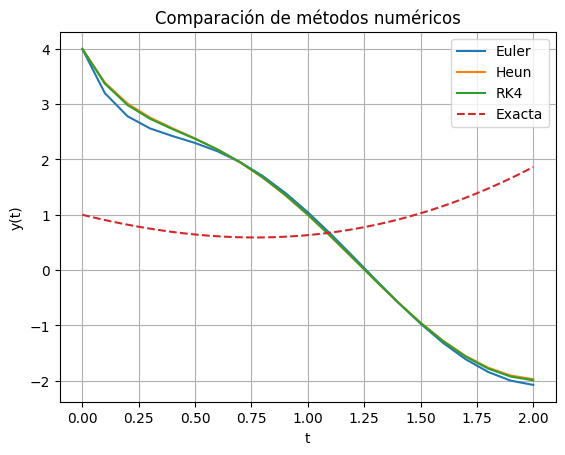

In [36]:
# EDO más jodida: comportamiento oscilatorio con amortiguamiento
def f(t, y):
    return -4*y + 8*np.cos(2*t) + 4*np.sin(2*t)

def y_exacta(t):
    return 2*np.exp(-4*t) + 2*np.cos(2*t)  # con y(0) = 4

# Ejecutar métodos
ye, te = euler(f, t0, tf, 4, h)
yh, th = heun(f, t0, tf, 4, h)
yr, tr = rk4(f, t0, tf, 4, h)

# Solución exacta
def y_exacta(t):
    return t**2 - 2*t + 2 - np.exp(-t)

t_vals = np.linspace(t0, tf, 100)
y_vals = y_exacta(t_vals)

# Comparar gráficamente
plt.plot(te, ye, label='Euler')
plt.plot(th, yh, label='Heun')
plt.plot(tr, yr, label='RK4')
plt.plot(t_vals, y_vals, label='Exacta', linestyle='dashed')
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparación de métodos numéricos')
plt.grid(True)
plt.show()

### Ejercicio 3.2: EDO con parámetro - Análisis de comportamiento

Estudia el comportamiento de una EDO con diferentes valores de parámetros.

**Variantes:**
- Variante A: `y' = α(y - 2)²`, `y(0) = k`, `α ∈ {-1, 0, 1}`
- Variante B: `y' = y(y - 2)(y - 4)`, `y(0) = k ∈ [0, 5]`
- Variante C: `y' = -y + α·sin(t)`, `y(0) = 0`, `α ∈ {0.5, 1, 2}`

**Tareas:**
1. Resolver para múltiples valores del parámetro
2. Identificar puntos de equilibrio
3. Graficar familia de soluciones
4. Analizar estabilidad de equilibrios
5. Crear diagrama de bifurcación si aplica

In [ ]:
# Variante B: Sistema con múltiples equilibrios
def f_param(t, y):
    return y * (y - 2) * (y - 4)

# Análisis de equilibrios
# Implementar aquí

In [ ]:
# Familia de soluciones
# Implementar aquí

---
## 🔗 Sistemas de EDOs

### Ejercicio 4.1: Modelo Lotka-Volterra (Predador-Presa)

Implementa y analiza el modelo clásico de dinámica de poblaciones.

**Sistema:**
- `x' = ax - bxy` (presas)
- `y' = -cy + dxy` (predadores)
- Parámetros: `a=1, b=0.1, c=1.5, d=0.075`
- Condiciones iniciales: probar `(10,5)`, `(40,9)`, `(15,15)`

**Tareas:**
1. Implementar el sistema con solve_ivp
2. Graficar evolución temporal de ambas poblaciones
3. Crear retrato de fase mostrando ciclos
4. Encontrar punto de equilibrio no trivial
5. Estudiar período de oscilaciones

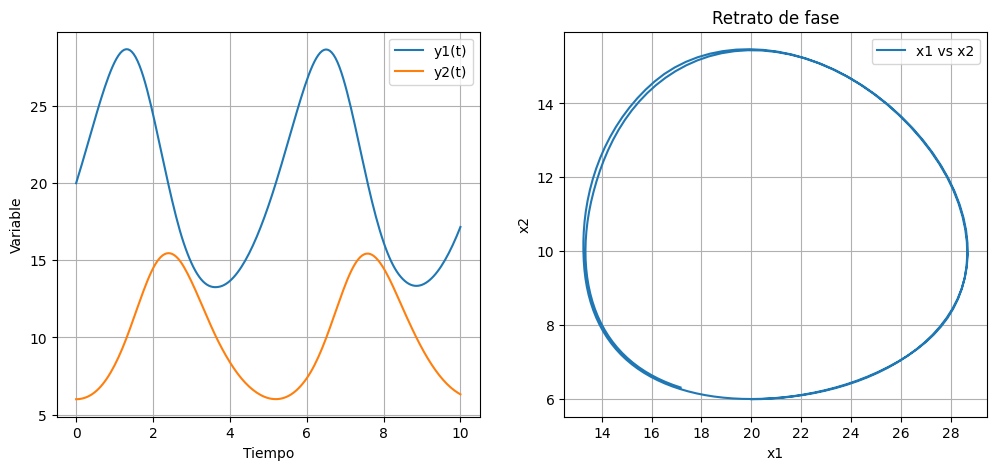

In [45]:
def lotka_volterra(t, y, a=1, b=0.1, c=1.5, d=0.075):
    """
    Sistema Lotka-Volterra
    y[0] = x (presas)
    y[1] = y (predadores)
    """
    x, y = y[0], y[1]
    f1 = a*x - b*x*y
    f2 = -c*y + d*x*y
    return [f1, f2]

def euler_sistemas(F, t0, tf, y0, h):
    solucion = solve_ivp(F, [t0, tf], y0, dense_output=True)
    num_pasos = int((tf - t0)/ h) + 1
    t = np.linspace(t0, tf, num_pasos)
    Y = solucion.sol(t)
    return t, Y

t, Y = euler_sistemas(lotka_volterra, 0, 10, [20,6], 0.05)
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, Y[0], label="y1(t)")
plt.plot(t, Y[1], label="y2(t)")
plt.xlabel("Tiempo")
plt.ylabel("Variable")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(Y[0], Y[1], label="x1 vs x2")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Retrato de fase')
plt.legend()
plt.grid()

# plt.tight_layout()
plt.show()

In [ ]:
# Análisis y visualización
# Implementar aquí

### Ejercicio 4.2: Péndulo no lineal

Analiza el comportamiento de un péndulo con grandes amplitudes.

**Sistema:**
- `θ'' + (g/L)sin(θ) + γθ' = 0`
- Convertir a sistema: `θ' = ω`, `ω' = -(g/L)sin(θ) - γω`
- Parámetros: `g/L = 1`, `γ = 0.1` (amortiguamiento)

**Tareas:**
1. Resolver para diferentes amplitudes iniciales
2. Comparar con aproximación lineal (sin(θ) ≈ θ)
3. Crear retratos de fase para diferentes energías
4. Identificar separatriz (órbita que separa comportamientos)
5. Estudiar período vs amplitud

In [ ]:
def pendulo_no_lineal(t, y, g_L=1, gamma=0.1):
    """
    Péndulo no lineal
    y[0] = θ (ángulo)
    y[1] = ω (velocidad angular)
    """
    # Implementar aquí
    pass

def pendulo_lineal(t, y, g_L=1, gamma=0.1):
    """
    Aproximación lineal para comparación
    """
    # Implementar aquí
    pass

In [ ]:
# Análisis comparativo
# Implementar aquí

---
## 🌊 Ecuaciones en Derivadas Parciales

### Ejercicio 5.1: Ecuación de calor 1D

Resuelve la ecuación de difusión usando diferencias finitas.

**Problema:**
- `∂u/∂t = α ∂²u/∂x²` en `[0,1]×[0,T]`
- Condiciones: `u(0,t) = u(1,t) = 0`
- Inicial: `u(x,0) = sin(πx)` o `4x(1-x)`
- `α = 0.1` (difusividad)

**Tareas:**
1. Implementar esquema explícito (FTCS)
2. Verificar condición de estabilidad: `Δt ≤ Δx²/(2α)`
3. Graficar evolución temporal (snapshots)
4. Crear animación de la difusión
5. Comparar con esquema implícito

In [51]:
def calor_explicito(u0, alpha, L, T, Nx, Nt):
    """
    Ecuación de calor con esquema explícito FTCS
    
    Parameters:
    u0: función de condición inicial
    alpha: coeficiente de difusión
    L: longitud del dominio
    T: tiempo final
    Nx: número de puntos en x
    Nt: número de pasos temporales
    """
    dx = L / (Nx + 1)
    dt = T / Nt
    x = np.linspace(0, L, Nx+2)
    r = alpha * dt / dx**2

    if r > 0.5:
        print(f"⚠️ Inestable: r = {r:.3f} > 0.5")
    else:
        print(f"✅ Estable: r = {r:.3f} ≤ 0.5")

    # Condición inicial
    u = u0(x)
    u[0] = u[-1] = 0 # u(0,t) = u(1,t) = 0

    # Discretización de la ecuación ∂u/∂t = α ∂²u/∂x² usando FTCS
    # Aproximamos: (u_i^{n+1} - u_i^n)/dt ≈ α (u_{i-1}^n - 2u_i^n + u_{i+1}^n)/dx²
    # Reordenando: u_i^{n+1} = u_i^n + λ(u_{i-1}^n - 2u_i^n + u_{i+1}^n)
    # Esto se puede escribir como: u^{n+1} = A * u^n, donde A es una matriz tridiagonal:
    # A = diag(λ, 1 - 2λ, λ)
    
    A = np.zeros((Nx, Nx))
    for i in range(Nx):
        A[i, i] = 1 - 2 * r # Coeficiente de u_i^n
        if i > 0: A[i, i-1] = r    # Coeficiente de u_{i-1}^n
        if i < Nx - 1: A[i, i+1] = r # Coeficiente de u_{i+1}^n

    U = [u.copy()]
    for n in range(Nt):
        u_interior = u[1:-1]
        u = np.concatenate(([u[0]], u_interior, [u[1]])) 
        U.append(u.copy())
    
    return x, np.array(U), A

# Parámetros del problema
alpha = 0.1
L = 1
T = 0.5
Nx = 20
Nt = 100

def u0(x):
    return np.sin(np.pi * x)

x, U, A = calor_explicito(u0, alpha, L, T, Nx, Nt)
print("Matriz A (tridiagonal FTCS):")
print(A)

✅ Estable: r = 0.221 ≤ 0.5
Matriz A (tridiagonal FTCS):
[[0.559  0.2205 0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.2205 0.559  0.2205 0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.2205 0.559  0.2205 0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.2205 0.559  0.2205 0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.2205 0.559  0.2205 0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.2205 0.559  0.2205 0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.2205 0.559  0.2205 0.     0.
  0.     0.     0.     0.     

In [ ]:
# Snapshots de la evolución temporal
plt.figure(figsize=(10,5))
for i in range(0, Nt+1, Nt//5):
    plt.plot(x, U[i], label=f't={i*T/Nt:.2f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Evolución de la ecuación de calor (esquema explícito FTCS)')
plt.legend()
plt.grid()
plt.show()

### Ejercicio 5.2: Problema con condiciones mixtas

Resuelve una EDP con condiciones de frontera Dirichlet y Neumann.

**Problema:**
- `-u'' + β(x)u = f(x)` en `[0,2]`
- `u(0) = 1` (Dirichlet)
- `u'(2) = 0` (Neumann)
- `β(x) = 1 + x²`, `f(x) = x`

**Tareas:**
1. Implementar diferencias finitas con condición Neumann
2. Usar ghost point o diferencias hacia atrás en x=2
3. Resolver sistema resultante
4. Verificar que u'(2) ≈ 0
5. Comparar ambos enfoques para Neumann

In [ ]:
def problema_mixto(N, beta_func, f_func, u0, du_L):
    """
    Resuelve -u'' + β(x)u = f(x) con condiciones mixtas
    
    Parameters:
    N: número de puntos interiores
    beta_func: función β(x)
    f_func: función f(x)
    u0: valor en x=0 (Dirichlet)
    du_L: derivada en x=L (Neumann)
    """
    # Implementar aquí
    pass

# Funciones del problema
def beta(x):
    return 1 + x**2

def f(x):
    return x

In [ ]:
# Comparación de métodos para condición Neumann
# Implementar aquí

---
## 📏 Normas y Métodos Especiales

### Ejercicio 6.1: Estimación iterativa de norma-2

Implementa y analiza el método de estimación de norma matricial.

**Matrices de prueba:**
- Simétrica 5x5
- No simétrica 6x6
- Matriz sparse 20x20

**Tareas:**
1. Implementar algoritmo de estimación con vectores aleatorios
2. Estudiar convergencia con 200 iteraciones
3. Analizar varianza de las estimaciones
4. Comparar con método de la potencia
5. Estudiar efecto de la distribución inicial

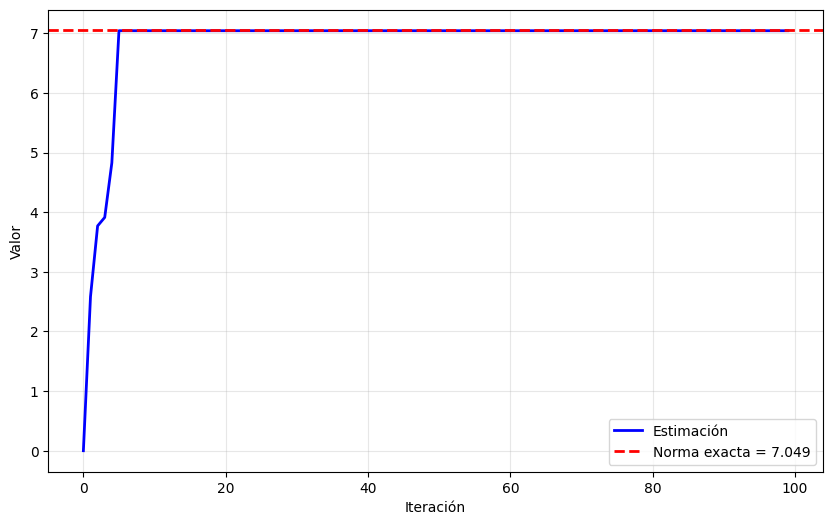

Estimación: 7.044516
Exacta:     7.048917


In [52]:
def estimar_norma2(A, n_iter=200):
    """
    Estima ||A||_2 usando vectores aleatorios
    
    Returns:
    estimaciones: array con estimación en cada iteración
    """
    x = np.zeros(n_iter)
    x[0] = 0
    for k in range(1, n_iter):
        z_k = np.random.randn(A.shape[0])
        ratio = np.linalg.norm(A @ z_k) / np.linalg.norm(z_k)
        x[k] = max(x[k-1], ratio) # compara entre el intento anterior con el nuevo (ratio)
    return x

# Matriz de prueba 3x3
A = np.array([[4, 1, 2], 
             [1, 3, 1], 
             [2, 1, 5]])

# Probar estimación de norma
x_sucesion = estimar_norma2(A, 100)

plt.figure(figsize=(10, 6))
plt.plot(x_sucesion, 'b-', linewidth=2, label='Estimación')
plt.axhline(np.linalg.norm(A, 2), color='r', linestyle='--', 
           linewidth=2, label=f'Norma exacta = {np.linalg.norm(A, 2):.3f}')
plt.xlabel('Iteración')
plt.ylabel('Valor')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Estimación: {x_sucesion[-1]:.6f}")
print(f"Exacta:     {np.linalg.norm(A, 2):.6f}")

In [ ]:
# Análisis estadístico y comparaciones
# Implementar aquí

---
## 📝 Conclusiones

Escribe aquí tus observaciones principales sobre:
- Métodos que funcionaron mejor para cada tipo de problema
- Dificultades encontradas
- Comparaciones entre métodos similares
- Recomendaciones para futuros usos

In [ ]:
# Espacio para código adicional o pruebas